In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pyproj import Proj, Transformer
#import pyproj
import folium
from shapely.geometry import Point as point
import seaborn as sns
import random as rd
df = pd.read_excel("20220510 송장 좌표 데이터.xlsx") #아래와 같은 xlsx파일 업로드
df

,Unnamed: 0,위도,경도
0,0,37.735348,127.039431
1,1,37.735348,127.039431
2,2,37.735348,127.039431
3,3,37.735348,127.039431
4,4,37.735312,127.041107
...,...,...,...
338,338,37.735438,127.039950
339,339,37.735150,127.040889
340,340,37.733967,127.042621
341,341,37.734834,127.041135


In [84]:
X = df.iloc[:,[2]].values #X좌표
Y = df.iloc[:,[1]].values #Y좌표
Z = np.hstack([X,Y]) #X,Y좌표

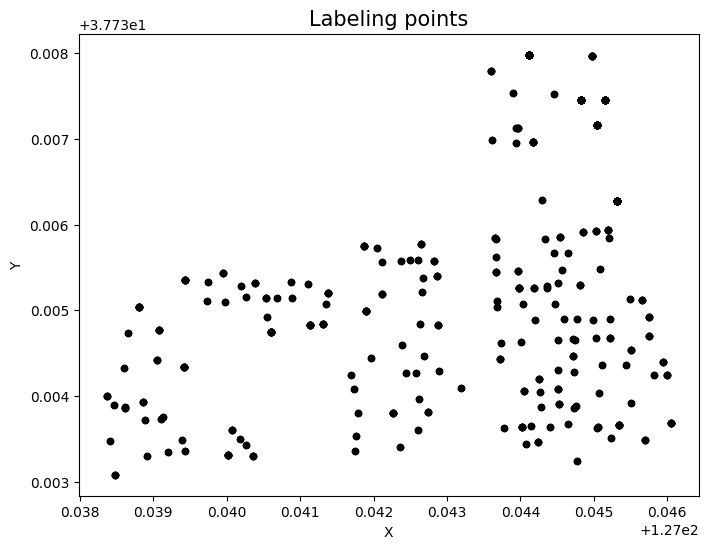

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=20,color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Labeling points",fontsize=15)
for i in range(len(X)):
    plt.scatter(X[i], Y[i], color="black", s=20)
plt.show() #화면에 지점을 표시

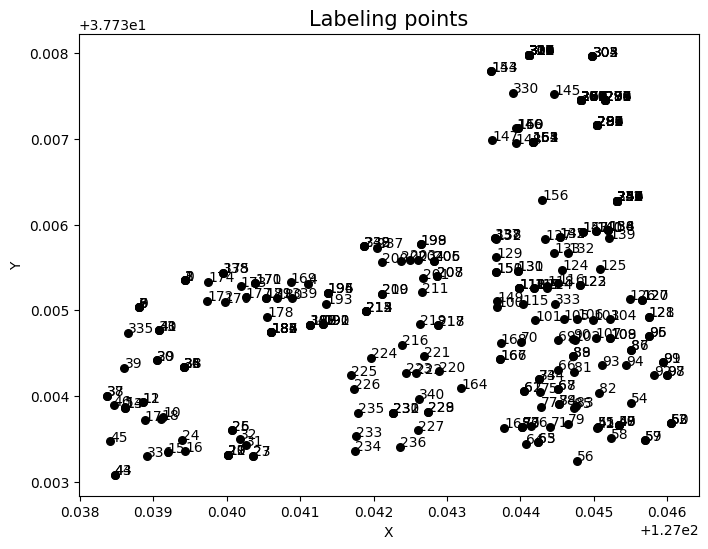

In [86]:
annotations=["0","1","2","3","4","5","6","7","8","9"
,"10","11","12","13","14","15","16","17","18","19"
,"20","21","22","23","24","25","26","27","28","29"
,"30","31","32","33","34","35","36","37","38","39"
,"40","41","42","43","44","45","46","47","48","49"
,"50","51","52","53","54","55","56","57","58","59"
,"60","61","62","63","64","65","66","67","68","69"
,"70","71","72","73","74","75","76","77","78","79"
,"80","81","82","83","84","85","86","87","88","89"
,"90","91","92","93","94","95","96","97","98","99"
,"100","101","102","103","104","105","106","107","108","109"
,"110","111","112","113","114","115","116","117","118","119"
,"120","121","122","123","124","125","126","127","128","129"
,"130","131","132","133","134","135","136","137","138","139"
,"140","141","142","143","144","145","146","147","148","149"
,"150","151","152","153","154","155","156","157","158","159"
,"160","161","162","163","164","165","166","167","168","169"
,"170","171","172","173","174","175","176","177","178","179"
,"180","181","182","183","184","185","186","187","188","189"
,"190","191","192","193","194","195","196","197","198","199"
,"200","201","202","203","204","205","206","207","208","209"
,"210","211","212","213","214","215","216","217","218","219"
,"220","221","222","223","224","225","226","227","228","229"
,"230","231","232","233","234","235","236","237","238","239"
,"240","241","242","243","244","245","246","247","248","249"
,"250","251","252","253","254","255","256","257","258","259"
,"260","261","262","263","264","265","266","267","268","269"
,"270","271","272","273","274","275","276","277","278","279"
,"280","281","282","283","284","285","286","287","288","289"
,"290","291","292","293","294","295","296","297","298","299"
,"300","301","302","303","304","305","306","307","308","309"
,"310","311","312","313","314","315","316","317","318","319"
,"320","321","322","323","324","325","326","327","328","329"
,"330","331","332","333","334","335","336","337","338","339"
,"340","341","342"] #개수에 맞게 적용하는데 이 코드가 없어도 전혀 상관 없음

plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=30,color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Labeling points",fontsize=15)
for i, label in enumerate(annotations):
    plt.text(X[i], Y[i],label) #라벨링 시각화
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow curve')

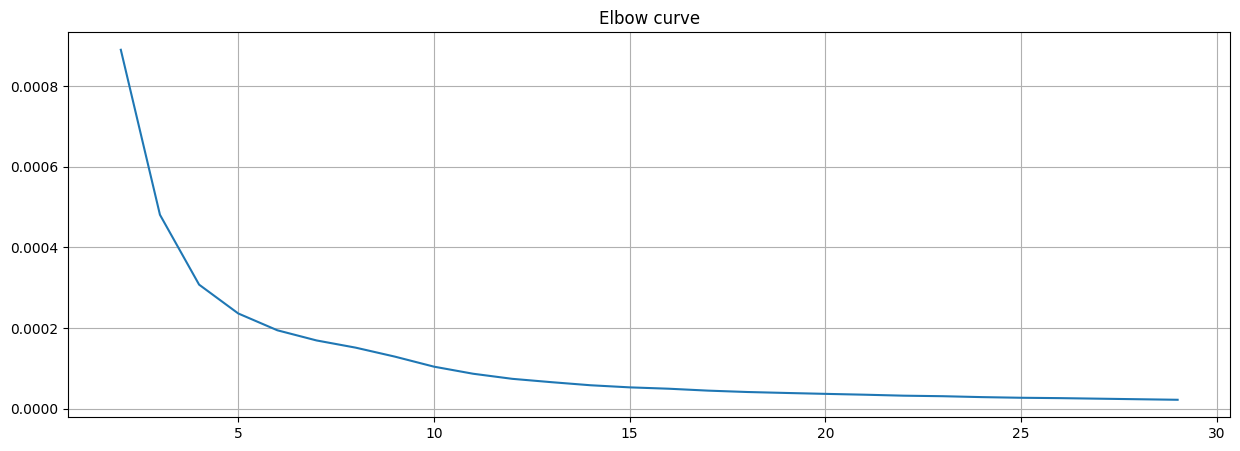

In [87]:
#Elbow curve
from sklearn.cluster import KMeans
distortions = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 30), distortions)
plt.grid(True)
plt.title('Elbow curve')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




[[127.03889032500001 37.7349000725 8
  array([127.0388099 , 127.0388099 , 127.0388099 , 127.0388099 ,
         127.0390764 , 127.0390764 , 127.0390764 , 127.0386538 ,
          37.73503778,  37.73503778,  37.73503778,  37.73503778,
          37.73476965,  37.73476965,  37.73476965,  37.73474051])]
 [127.04446853333336 37.735863548333334 6
  array([127.0446471 , 127.0444571 , 127.0445366 , 127.0443352 ,
         127.0445366 , 127.0442986 ,  37.73567315,  37.73567322,
          37.73585564,  37.73583094,  37.73585564,  37.7362927 ])]
 [127.0427276111111 37.734497095555554 9
  array([127.0431969 , 127.0423861 , 127.0428712 , 127.0428712 ,
         127.0426386 , 127.0428879 , 127.042681  , 127.0425787 ,
         127.0424369 ,  37.73408798,  37.73459958,  37.7348269 ,
          37.7348269 ,  37.7348405 ,  37.73428631,  37.73446433,
          37.7342684 ,  37.73427296])                           ]
 [127.04407331071435 37.7379548332143 28
  array([127.0436018 , 127.0436018 , 127.0441181 , 1

<ipython-input-125-8834cc8526b1>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  CL=np.append(CL,np.array([[(sum/cnt),(sum2/cnt2),cnt2,CL_list[a]]]),axis=0)


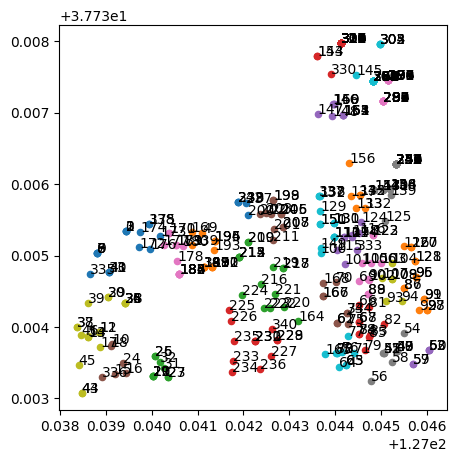

In [125]:
#K-means 결과
K = 30 #K-means는 클러스터 개수를 지정
model = KMeans(n_clusters = K)
model.fit(Z)
CL_list = []
plt.figure(figsize=(5,5))
for k in range(K): #클러스터 리스트 생성
    plt.scatter(Z[model.labels_ ==k,0], Z[model.labels_==k,1],s=20)
    Ck = []
    Ck = np.append(Z[model.labels_ ==k,0], Z[model.labels_==k,1])
    CL_list.append(Ck)
for i, label in enumerate(annotations):
    plt.text(X[i], Y[i],label)
print("\n")

cnt,sum,cnt2,sum2=0,0,0,0 #X,Y 중심점을 구하기 위한 변수
CL=np.empty((0,4),float) #4col float array
for a in range(K): 
  for j in Z[model.labels_==a,0]:
    sum+=j #전체 K클러스터에 해당하는 X좌표를 더함
    cnt+=1 #중심점을 구하기 위해 나누는 목적 n
  for b in Z[model.labels_==a,1]:
    sum2+=b #전체 K클러스터에 해당하는 Y좌표를 더함
    cnt2+=1 #중심점을 구하기 위해 나누는 목적 n
  CL=np.append(CL,np.array([[(sum/cnt),(sum2/cnt2),cnt2,CL_list[a]]]),axis=0) #[1.클러스터 X중심,  2.클러스터 Y중심,  3.개수,  4.클러스터에 해당 좌표 리스트]
  cnt,sum,cnt2,sum2=0,0,0,0 #K번 반복을 위해 초기화 

print(CL)

In [90]:
import csv
df2 = pd.DataFrame(CL)
df2.to_csv('CL.csv') #엑셀로 출력

In [91]:
#MeanShift
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
meanshift = MeanShift(bandwidth=0.002)
cluster_labels = meanshift.fit_predict(Z)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1]


In [92]:
bandwidth = estimate_bandwidth(Z)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.002


In [93]:
best_bandwidth = estimate_bandwidth(Z)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(Z)
print('best bandwidth cluster labels 유형:',np.unique(cluster_labels))

best bandwidth cluster labels 유형: [0 1]


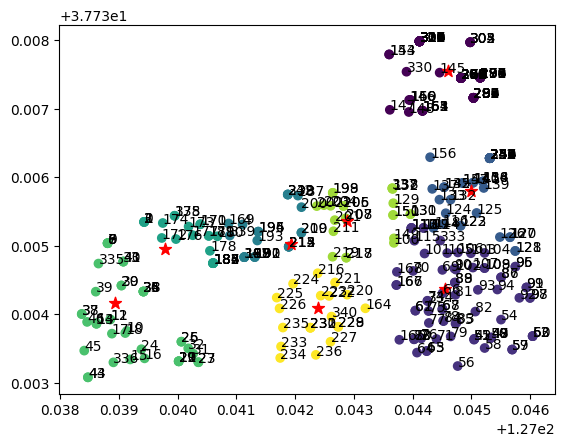

[4 4 4 4 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 6 6 6 2 2 2 2 2 2 6 2 2 2 2 2 0 0 0 0
 0 6 6 6 6 0 0 0 2 2 2 0 0 0 0 0 7 1 1 1 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 3 3 3 3 3 3 3 3 3 3 6 6 3 6 6 6 6 6 6 6 6 3 3 6 3 3 3 3 7 6 6 6 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 1 1 5 5 6 4 3 7 3 3]
[[127.04460234  37.73754912]
 [127.04455497  37.73437333]
 [127.04500183  37.73579555]
 [127.0419288   37.73502492]
 [127.03979057  37.73495405]
 [127.03892695  37.73416801]
 [127.0428792   37.73536667]
 [127.04239441  37.73408583]]
[[127.0436018, 127.044461, 127.0439418, 127.0436127, 127.043936, 127.0

In [336]:
#MeanShift 결과
mshclust=MeanShift(bandwidth=0.001).fit(Z)
mshclust
labels = mshclust.labels_ #클러스터링 라벨
centers = mshclust.cluster_centers_ #클러스터 중심좌표

plt.scatter(Z[:,0], Z[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], marker='*', color="r",s=80 )
for i, label in enumerate(annotations):
    plt.text(X[i], Y[i],label)
plt.show()

print(labels)
print(centers)

CL_list=[] #클러스터 리스트 생성
for i in range(len(centers)): #클러스터 순서(개수)만큼 반복, 순서숫자=라벨숫자
  tmp=[]
  cnt1=0
  for j in labels: #라벨안에 있는 요소 하나하나 클러스터 순서 숫자와 비교
    if j==i: #라벨 숫자와 클러스터 순서 숫자가 같다면 X좌표를 전부 넣는다.
      tmp.append(X[cnt1][0])
    cnt1+=1
  cnt2=0
  for k in labels:
    if k==i: #라벨 숫자와 클러스터 순서 숫자가 같다면 Y좌표를 전부 넣는다.
      tmp.append(Y[cnt2][0])
    cnt2+=1
  CL_list.append(tmp) #클러스터 리스트에 합치기

print(CL_list)

CL=np.empty((0,4),float)
for i in range(len(centers)): 
  CL=np.append(CL,np.array([[centers[i][0],centers[i][1],len(CL_list[i])//2,np.array(CL_list[i])]]),axis=0) #[1.클러스터 X중심,  2.클러스터 Y중심,  3.개수,  4.클러스터에 해당 좌표 리스트]
print(CL)

In [177]:
import csv
df2 = pd.DataFrame(CL)
df2.to_csv('CL.csv') #엑셀로 출력

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  2
  2  2  2  2  2  2  2  2 19  2  2  2  2  2  2 19 19 19  2  2  2  2  2 19
 19 19  2  2 19  2  2  2 19  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 19 19  2  2
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  2  0 19 19 19  2  2  2  2  2  0  0 19  0  0  0  0
  0 19 19 19 19 19 19  0  0  0  0 19 19 19  0  0  0  0  0  0  0  0  0  0
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

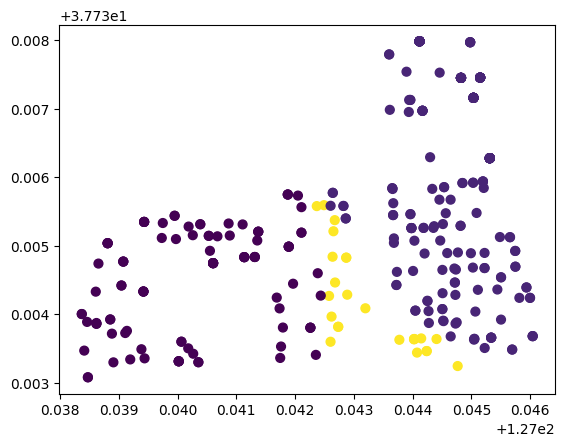

In [337]:
#GMM 결과
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=50).fit(Z) #데이터 군집 수
labels = gmm.predict(Z) #라벨
plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=40, cmap='viridis')
print(labels)
labels=list(labels) 
labels_num=set(labels) #set()으로 중복되는 클러스터링 숫자를 합해줌
labels_num=list(labels_num)

CL_list=[] #클러스터 리스트 생성
labels_cnt=[] #클러스터 개수 리스트 생성
for i in labels_num: #클러스터 각각 라벨링 번호로 for문
  tmp=[]
  cnt=0
  cnt1=0
  for j in range(len(labels)):#전체 좌표와 비교
    if i==labels[j]: #클러스터 라벨링 번호와 해당하는 순서(cnt1)의 좌표 라벨링이 일치하면
      tmp.append(X[cnt1][0]) #X좌표 넣기
    cnt1+=1
  cnt2=0
  for k in range(len(labels)): #전체 좌표와 비교
    if i==labels[k]: #클러스터 라벨링 번호와 해당하는 순서(cnt2)의 좌표 라벨링이 일치하면
      tmp.append(Y[cnt2][0]) #Y좌표 넣기
      cnt+=1
    cnt2+=1
  CL_list.append(tmp) #클러스터에 해당하는 전체 좌표
  labels_cnt.append(cnt) #클러스터 개수

CL_Center_X=[] #클러스터 X중심좌표 구하기
for i in range(len(CL_list)): 
  sum=0
  for j in CL_list[i]: 
    if(j<100):continue #임시로 X,Y좌표 구분을 위해 X좌표는 127정도로 추후 수정
    sum+=j
  CL_Center_X.append(sum/((len(CL_list[i])//2))) #전체 X좌표합 나누기 리스트길이 나누기2 이유는 길이가 X,Y 전부다여서 반으로 나눠줘야함

CL_Center_Y=[] #클러스터 Y중심좌표 구하기
for i in range(len(CL_list)):
  sum=0
  for j in CL_list[i]:
    if(j>100):continue #임시로 X,Y좌표 구분을 위해 Y좌표는 37정도로 추후 수정
    sum+=j
  CL_Center_Y.append(sum/((len(CL_list[i])//2)))#전체 Y좌표합 나누기 리스트길이 나누기2 이유는 길이가 X,Y 전부다여서 반으로 나눠줘야함

CL=np.empty((0,4),float)
for i in range(len(labels_num)): 
  CL=np.append(CL,np.array([[CL_Center_X[i],CL_Center_Y[i],labels_cnt[i],np.array(CL_list[i])]]),axis=0) #[1.클러스터 X중심,  2.클러스터 Y중심,  3.개수,  4.클러스터에 해당 좌표 리스트]

print(CL)

In [288]:
import csv
df2 = pd.DataFrame(CL)
df2.to_csv('CL.csv') #엑셀로 출력

In [289]:
#GMM
probs = gmm.predict_proba(Z)
print(probs[:5].round(3))

[[0.    0.078 0.006 0.    0.    0.162 0.    0.    0.02  0.096 0.002 0.
  0.016 0.068 0.    0.018 0.    0.084 0.036 0.003 0.    0.    0.    0.001
  0.071 0.    0.012 0.055 0.002 0.    0.05  0.    0.01  0.    0.    0.007
  0.023 0.01  0.    0.    0.077 0.001 0.001 0.018 0.    0.    0.    0.
  0.001 0.07 ]
 [0.    0.078 0.006 0.    0.    0.162 0.    0.    0.02  0.096 0.002 0.
  0.016 0.068 0.    0.018 0.    0.084 0.036 0.003 0.    0.    0.    0.001
  0.071 0.    0.012 0.055 0.002 0.    0.05  0.    0.01  0.    0.    0.007
  0.023 0.01  0.    0.    0.077 0.001 0.001 0.018 0.    0.    0.    0.
  0.001 0.07 ]
 [0.    0.078 0.006 0.    0.    0.162 0.    0.    0.02  0.096 0.002 0.
  0.016 0.068 0.    0.018 0.    0.084 0.036 0.003 0.    0.    0.    0.001
  0.071 0.    0.012 0.055 0.002 0.    0.05  0.    0.01  0.    0.    0.007
  0.023 0.01  0.    0.    0.077 0.001 0.001 0.018 0.    0.    0.    0.
  0.001 0.07 ]
 [0.    0.078 0.006 0.    0.    0.162 0.    0.    0.02  0.096 0.002 0.
  0.016 0.068 

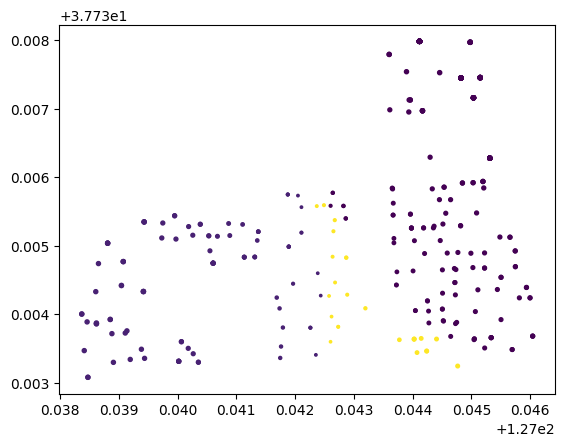

In [290]:
#GMM
size = 50 * probs.max(1) # square는 차이점을 강조
plt.scatter(Z[:, 0], Z[:, 1], c=labels, cmap='viridis', s=size);

[ 0  0  0  0 -1  1  2  2  2  2 -1  3  3  1  1 -1 -1 -1 -1  4  4  4  4  5
 -1  6  6  5  7  8  8 -1 -1  9  7  7  7 10 10 -1  9  9 11 12 12 -1 -1 13
 13 13 13 11 14 14 -1 11 -1 15 -1 15 14 16 16 17 -1 17 -1 18 18 -1 -1 -1
 19 19 20 -1 -1 -1 21 -1 19 -1 -1 -1 21 -1 22 22 23 23 -1 24 -1 -1 -1 25
 25 26 26 24 -1 -1 -1 -1 -1 -1 -1 -1 27 27 28 28 28 28 -1 -1 -1 29 -1 29
 30 31 32 32 -1 -1 -1 30 31 -1 33 33 -1 -1 34 35 34 -1 36 -1 37 37 35 38
 39 -1 40 -1 -1 -1 41 41 36 39 42 42 -1 38 34 40 40 42 42 42 -1 -1 43 43
 -1 -1 44 44 -1 -1 -1 45 -1 -1 -1 46 -1 46 47 47 47 47 47 47 48 48 49 49
 49 -1 50 50 50 48 51 51 -1 -1 -1 -1 -1 52 52 53 53 54 54 -1 55 55 55 55
 -1 56 56 -1 -1 -1 -1 -1 -1 -1 -1 -1 57 57 58 58 58 -1 -1 -1 -1 -1 59 59
 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 61 61 61 61 61 61
 61 61 61 61 61 61 61 61 61 61 61 62 62 62 62 62 62 62 63 63 63 63 63 63
 63 63 63 63 63 63 62 62 62 62 62 61 61 61 64 64 64 64 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65

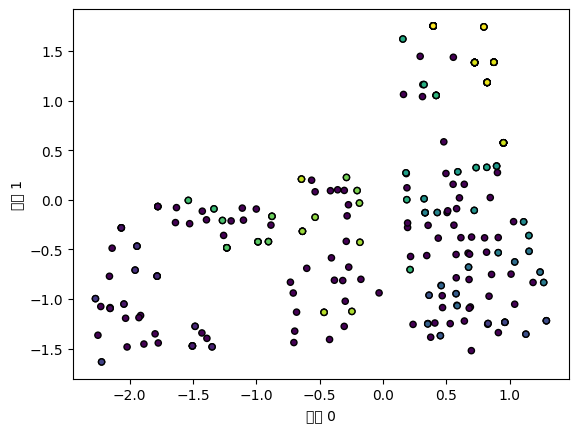

In [369]:
#DBSCAN 결과
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
scaler.fit(Z)
Z_scaled = scaler.transform(Z)

dbscan = DBSCAN(eps=0.01, min_samples=2) #최대 탐색 거리와 최소 샘플 개수
labels = dbscan.fit_predict(Z_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=labels, cmap='viridis', s=20, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

print(labels)
labels=list(labels) #리스트로 변환
labels_num=set(labels) #중복값 제거
labels_num=list(labels_num) #중복값 제거 set을 리스트로

CL_list=[] #클러스터링 리스트
labels_cnt=[] #클러스터링 개수
for i in labels_num: #클러스터 각각 라벨링 번호로 for문
  tmp=[]
  cnt=0
  cnt1=0
  for j in range(len(labels)): #전체 좌표와 비교
    if labels[j]==i: #클러스터 라벨링 번호와 해당하는 순서(cnt1)의 좌표 라벨링이 일치하면
      tmp.append(X[cnt1][0]) #X좌표 넣기
    cnt1+=1
  cnt2=0
  for k in range(len(labels)): #전체 좌표와 비교
    if labels[k]==i: #클러스터 라벨링 번호와 해당하는 순서(cnt2)의 좌표 라벨링이 일치하면
      tmp.append(Y[cnt2][0]) #Y좌표 넣기
      cnt+=1
    cnt2+=1
  CL_list.append(tmp) #클러스터에 해당하는 전체 좌표
  labels_cnt.append(cnt) #클러스터 개수
 
CL_Center_X=[] #클러스터 X중심좌표 구하기
for i in range(len(CL_list)):
  sum=0
  for j in CL_list[i]:
    if(j<100):continue #임시로 X,Y좌표 구분을 위해 X좌표는 127정도로 추후 수정
    sum+=j
  CL_Center_X.append(sum/((len(CL_list[i])//2))) #전체 X좌표합 나누기 리스트길이 나누기2 이유는 길이가 X,Y 전부다여서 반으로 나눠줘야함

CL_Center_Y=[] #클러스터 Y중심좌표 구하기
for i in range(len(CL_list)): 
  sum=0
  for j in CL_list[i]:
    if(j>100):continue #임시로 X,Y좌표 구분을 위해 Y좌표는 37정도로 추후 수정
    sum+=j
  CL_Center_Y.append(sum/((len(CL_list[i])//2))) #전체 Y좌표합 나누기 리스트길이 나누기2 이유는 길이가 X,Y 전부다여서 반으로 나눠줘야함 

CL=np.empty((0,4),float)
for i in range(len(labels_cnt)): 
  CL=np.append(CL,np.array([[CL_Center_X[i],CL_Center_Y[i],labels_cnt[i],np.array(CL_list[i])]]),axis=0) #[1.클러스터 X중심,  2.클러스터 Y중심,  3.개수,  4.클러스터에 해당 좌표 리스트]


for i in range(len(labels)):
  if labels[i]==-1: #-1 이상치
    CL=np.append(CL,np.array([[X[i][0],Y[i][0],1,-1]]),axis=0) #DBSCAN에서 이상치 -1 라벨링을 후에 처리하기 위해 [1. 이상치 X, 2.이상치 Y, 3. 1개, 4. -1(이상치표시)]로 작성 
print(CL)

In [370]:
import csv
df2 = pd.DataFrame(CL)
df2.to_csv('CL.csv') #엑셀로 출력